# MIDTERM ASSIGNMENT 

## Nishee Agrawal 
## 827172184


# PART1:

## 1. What is the difference between SparkContext and SparkSession?

- Spark 2.x Any Spark application started with a Spark Context.
- It's the main way to get to all of Spark's features whereas SparkSession is the entry point for all Spark functionality starting with Spark 2.x. 
- All of the features of SparkContext are also available in SparkSession.
- If someone wishes to utilize SparkContext instead, they are free to do so.



## 2. What is the difference between a Spark transformation and a Spark action?

Transformations are commands that tell Spark how to change a dataframe. 
- In Spark, they are evaluated simultaneously, that is, they are not executed until an action is invoked.
- Actions are the commands that tell Spark how to compute the outcome of a set of transformations. 
- As far as I can tell, actions are those that ask Spark to "display" data to the user, such as the show() and count() methods.

# 3. Cleaning Data

## a. What operations do we have on Panda DataFrames to deal with missing values?

- Pandas has two methods: fillna() and dropna().
- fillna is a function that fills na values with the specified value.
- dropna can be used to remove na-containing rows or columns from a table.

## b. What are some problems in dealing with missing values in Panda DataFrames?

- With real-time data, na values may or may not be na values. 
- It could alter depending on the situation. 
- As a result, procedures such as replace can be applied.

## c. What operations do we have on Spark DataFrames to deal with missing values.

- Spark has a number of methods for dealing with missing values. 
- There are a few that are drop and fill. 
- Fill is used to fill NA values with data and drop is used to drop rows/columns with NA values.

## 4.What is a categorical variable? Give an example. 

- Categorical variables are those variables that contain data from a small number of fixed categories.
- Example such as religion, language, countries etc

## 5.What are hyperparameters? Give an example.

- The parameters that regulate the model are known as hyperparameters.
- These settings are used to fine-tune the model for the best results.
- In multinomialbayes, alpha is an example of a hyperparameter.
- Another examples of hyperparam

## 6.What are two ways to determine a good value for the number of clusters when using K-means?

- We can choose an optimal number of clusters (K) in two ways: Silhouette analysis and the Elbow Curve Method.

 **1.Elbow Curve Method:**  
 - The elbow method clusters the dataset using k-means for a range of k values (say 1 to 10).  
 - By Apply K-means clustering to all of these various K values. We determine average distances to the centroid      over   all data points for each of the K values. 
 - By Plotting these spots to find the "Elbow," or the point where the average distance from the centroid rapidly decreases.

 **2.The silhouette Analaysis:** 
 - Coefficient indicates how similar a data point is within a cluster (cohesion) when compared to other clusters (separation). 
 - And Choosing a k range (say 1 to 10). 
 - For each K value, plot the Silhouette coefficient.

Reference:
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

## PART2 PROBLEM 1

In [67]:
#Importing the python libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import numpy as np
import seaborn as sns
import sklearn.model_selection
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [39]:
#Pathway for files
path_to_datasets_file="" #add prefix path here
gre= path_to_datasets_file + "gpa-gre.csv"
election_datavalues= [path_to_datasets_file + "Russia2012_1of2.xls", path_to_datasets_file + "Russia2012_2of2.xls"]


In [40]:
#Reading the CSV file
gre_datavalues = pd.read_csv(gre)
gre_datavalues = gre_datavalues.dropna()
gre_datavalues

,Year,GPA,Verbal,Quant
0,1,4.00,420.0,800.0
1,1,3.88,480.0,770.0
2,1,3.88,480.0,780.0
3,1,3.87,440.0,690.0
4,1,3.85,320.0,800.0
...,...,...,...,...
1079,16,3.17,480.0,700.0
1080,16,3.11,550.0,440.0
1081,16,3.09,280.0,610.0
1082,16,3.07,270.0,780.0


In [78]:
#Calculation for GRE Values
gre_datavalues['GRE'] = gre_datavalues.Quant+gre_datavalues.Verbal
X = gre_datavalues.GRE
Y = gre_datavalues.GPA
X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

<ipython-input-78-2034d792eaa0>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
<ipython-input-78-2034d792eaa0>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y = Y[:,np.newaxis]


In [81]:
#Spiltting the data into Train and Test data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.3)

In [82]:
#Model Implementation
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print("Regression Equation: Y = X"+str(model.coef_[0])+"+"+str(model.intercept_))

Regression Equation: Y = X[0.00064243]+[2.74284171]


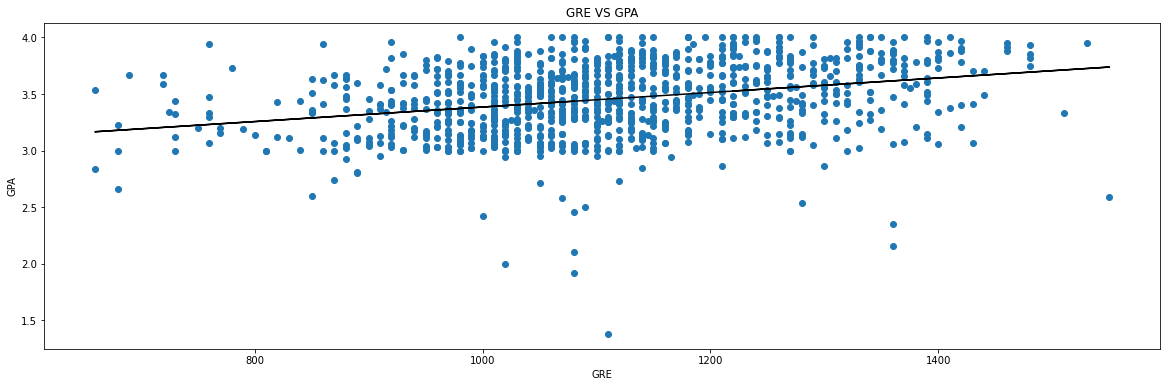

In [83]:
#Plotting the graph
plt.scatter(X, Y)
plt.xlabel("GRE")
plt.ylabel("GPA")
plt.plot(X, model.coef_[0]*X+model.intercept_, color='black')
plt.title("GRE VS GPA")
plt.show()

In [14]:
#Importing the scores
from sklearn.metrics import r2_score
r2_score(Y_test,model.predict(X_test))

0.03556326149870248

The R-squared value is very low, indicating that the student's GRE score is not very good in predicting his or her GPA. 

# PROBLEM 2


In [16]:
categories = ['comp.os.ms-windows.misc', 'sci.electronics', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.graphics']
train_data = fetch_20newsgroups(subset='train',categories = categories)
test_data = fetch_20newsgroups(subset='test',categories = categories)

# TF-IDF

In [17]:
#Implementatoin for TF-IDF
vectorizer_tf_idf = TfidfVectorizer()
train = vectorizer_tf_idf.fit_transform(train_data.data)
test =  vectorizer_tf_idf.transform(test_data.data)

In [18]:
modelused = MultinomialNB(alpha=0.01)
modelused.fit(train, train_data.target)
predicted_tf = modelused.predict(test)
score_tf_idf=metrics.f1_score(test_data.target,predicted_tf, average='macro')
print("TF-IDF value is:",score_tf_idf)

TF-IDF value is: 0.7793826990227692


In [85]:
#Declaration of confusion matric
confusion_matrix_tf_idf = confusion_matrix(test_data.target,predicted_tf)

<AxesSubplot:>

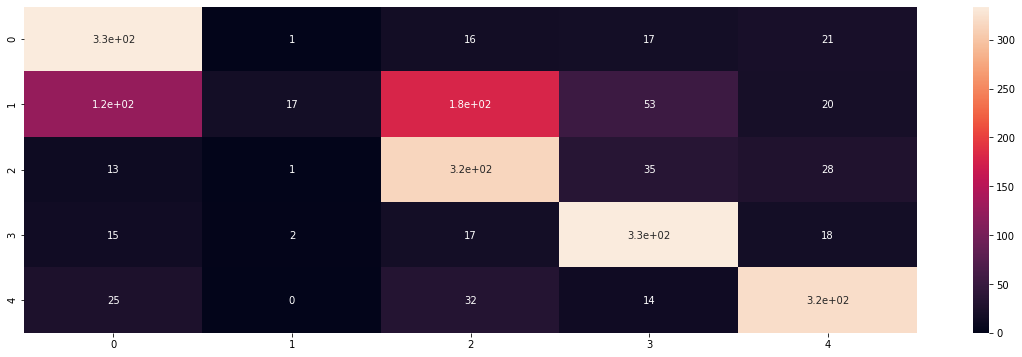

In [61]:
#Plotting the heat map
sns.heatmap(confusion_matrix_count, annot=True)

# Count Vectorizer

In [21]:
#Declaration for Count Vector
vectorizer_count = CountVectorizer()
count_train = vectorizer_count.fit_transform(train_data.data)
count_test =  vectorizer_count.transform(test_data.data)

In [23]:
model_second = MultinomialNB(alpha=0.01)
model_second.fit(count_train, train_data.target)
predicted_count = model_second.predict(count_test)
vector_count = metrics.f1_score(test_data.target,predicted_count, average='macro')
print("Count vectorizer value is:",vector_count)

Count vectorizer value is: 0.6168956336544127


In [84]:
confusion_matrix_count = confusion_matrix(test_data.target, predicted_count)

<AxesSubplot:>

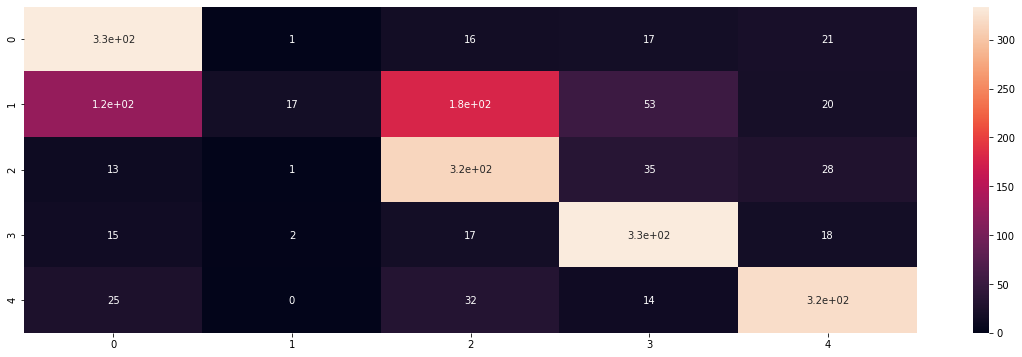

In [62]:
#Plotting the heat map
sns.heatmap(confusion_matrix_count, annot=True)

Because TF-IDF has a higher F1 score than count vectoriser, and we can see from the confusion matrix that tf-idf has a lower amount of False positives than count vectoriser, it appears to be a better performer.

# PROBLEM 3

# To clean russia election data:
1.Calculated the number of missing votes, i.e. 'A' and nAn, for the first row of the first sheet: It was calculated using Number of valid ballots and percentage of votes cast for a specific candidate
2.With column value 'c', I calculated the missing percentage value for Vladimir Putin using the number of valid ballots and votes counted for him.

Note: I counted the number of valid ballots as the overall number of votes.

In [86]:
#Russion 2012 Election Data
election_data = pd.DataFrame()
for election_data_file in election_datavalues:
    election_data = election_data.append(pd.read_excel(election_data_file),ignore_index=True)


In [87]:
election_data = election_data.iloc[:,[0,2,11,21,22,23,24,25,26,27,28,29,30]]
#Mapping the datavalues 
mapping = {election_data.columns[0]:'district', 
          election_data.columns[1]: 'total_voters', 
          election_data.columns[2]: 'total_votes', 
          election_data.columns[3]: 'votes_ZVZ', 
          election_data.columns[4]: 'voting_percent_ZVZ', 
          election_data.columns[5]: 'votes_GAZ', 
          election_data.columns[6]: 'voting_percent_GAZ', 
          election_data.columns[7]: 'votes_SMM', 
          election_data.columns[8]: 'voting_percent_SMM', 
          election_data.columns[9]: 'votes_MP', 
          election_data.columns[10]: 'voting_percent_MP', 
          election_data.columns[11]: 'votes_VP', 
          election_data.columns[12]: 'voting_percent_VP'}
election_data = election_data.rename(columns=mapping)

In [ ]:
election_data.loc[election_data['votes_ZVZ'] == 'A',['votes_ZVZ']] = '-100'
election_data.loc[election_data['votes_GAZ'] == 'A',['votes_GAZ']] = '-100'
election_data.loc[election_data['votes_SMM'] == 'A',['votes_SMM']] = '-100'
election_data.loc[election_data['votes_MP'] == 'A',['votes_MP']] = '-100'
election_data.loc[election_data['votes_VP'] == 'A',['votes_VP']] = '-100'

election_data['voting_percent_VP'] = np.where(election_data['voting_percent_VP']  == "c", 
                           ((election_data['votes_VP'].astype('float') * 100)/election_data['total_votes'].astype('float')).astype('str') + "%",
                           election_data['voting_percent_VP'])  
election_data.loc[election_data['voting_percent_VP'] == '80.58% free',['voting_percent_VP']] = '80.58%'
election_data['voting_percent_ZVZ'] = election_data['voting_percent_ZVZ'].str.rstrip('%').astype('float')
election_data['voting_percent_GAZ'] = election_data['voting_percent_GAZ'].str.rstrip('%').astype('float')
election_data['voting_percent_SMM'] = election_data['voting_percent_SMM'].str.rstrip('%').astype('float')
election_data['voting_percent_MP'] = election_data['voting_percent_MP'].str.rstrip('%').astype('float')
election_data['voting_percent_VP'] = election_data['voting_percent_VP'].str.rstrip('%').astype('float')



In [ ]:

#Declaring the Voting conditions and counts
election_data['votes_ZVZ'] = np.where((election_data['votes_ZVZ']  == "-100") |
                                     (election_data['votes_ZVZ'].isnull()), 
                           ((election_data['total_votes'].astype('float') * election_data['voting_percent_ZVZ'].apply(np.round, args=[0])/100)).apply(np.ceil),
                           election_data['votes_ZVZ'].astype('float'))
election_data['votes_GAZ'] = np.where((election_data['votes_GAZ']  == "-100") |
                                     (election_data['votes_GAZ'].isnull()), 
                           ((election_data['total_votes'].astype('float') * election_data['voting_percent_GAZ'].apply(np.round, args=[0])/100)).apply(np.ceil),
                           election_data['votes_GAZ'].astype('float'))
election_data['votes_SMM'] = np.where((election_data['votes_SMM']  == "-100") |
                                     (election_data['votes_SMM'].isnull()), 
                           ((election_data['total_votes'].astype('float') * election_data['voting_percent_SMM'].apply(np.round, args=[0])/100)).apply(np.ceil),
                         election_data['votes_SMM'].astype('float'))
election_data['votes_MP'] = np.where((election_data['votes_MP']  == "-100") |
                                     (election_data['votes_MP'].isnull()), 
                           ((election_data['total_votes'].astype('float') * election_data['voting_percent_MP'].apply(np.round, args=[0])/100)).apply(np.ceil),
                          election_data['votes_MP'].astype('float'))
election_data['votes_VP'] = np.where((election_data['votes_VP']  == "-100") |
                                     (election_data['votes_VP'].isnull()), 
                           ((election_data['total_votes'].astype('float') * election_data['voting_percent_VP'].apply(np.round, args=[0])/100)).apply(np.ceil),
                           election_data['votes_VP'].astype('float'))
election_data

b. Calculate the turnout rate for each district. This is calculated by dividing the total number of votes cast by the total number of voters in each district. Make a histogram of the turnout rate in each district for each country.

In [54]:
#Declaraton and calculation of turnout rate districtwise 
districtwise_election_agg_data = election_data
districtwise_election_agg_data['turnout'] = (districtwise_election_agg_data['total_votes']/districtwise_election_agg_data['total_voters'])*100
districtwise_election_agg_data

,district,total_voters,total_votes,votes_ZVZ,voting_percent_ZVZ,votes_GAZ,voting_percent_GAZ,votes_SMM,voting_percent_SMM,votes_MP,voting_percent_MP,votes_VP,voting_percent_VP,turnout
0,Republic of Adygea (Adygea),2383,1571,32.0,1.51,378.0,24.03,32.0,1.76,63.0,4.47,1053.0,67.04,65.925304
1,Republic of Adygea (Adygea),2865,1831,51.0,2.74,453.0,24.35,49.0,2.63,104.0,5.59,1174.0,63.12,63.909250
2,Republic of Adygea (Adygea),2821,1673,36.0,2.11,481.0,28.23,24.0,1.41,107.0,6.28,1025.0,60.15,59.305211
3,Republic of Adygea (Adygea),2069,1246,0.0,0.00,414.0,33.23,0.0,0.00,48.0,3.85,784.0,62.92,60.222330
4,Republic of Adygea (Adygea),777,454,19.0,4.11,138.0,29.87,4.0,0.87,7.0,1.52,286.0,61.90,58.429858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95568,The area outside the Russian Federation,1592,1489,12.0,0.75,8.0,0.50,3.0,0.19,6.0,0.38,1460.0,91.71,93.530151
95569,The area outside the Russian Federation,1233,994,113.0,11.31,74.0,7.41,13.0,1.30,46.0,4.60,748.0,74.87,80.616383
95570,The area outside the Russian Federation,1093,463,2.0,0.42,32.0,6.79,0.0,0.00,3.0,0.64,426.0,90.45,42.360476
95571,The area outside the Russian Federation,113,112,6.0,5.31,33.0,29.20,7.0,6.19,23.0,20.35,43.0,38.05,99.115044


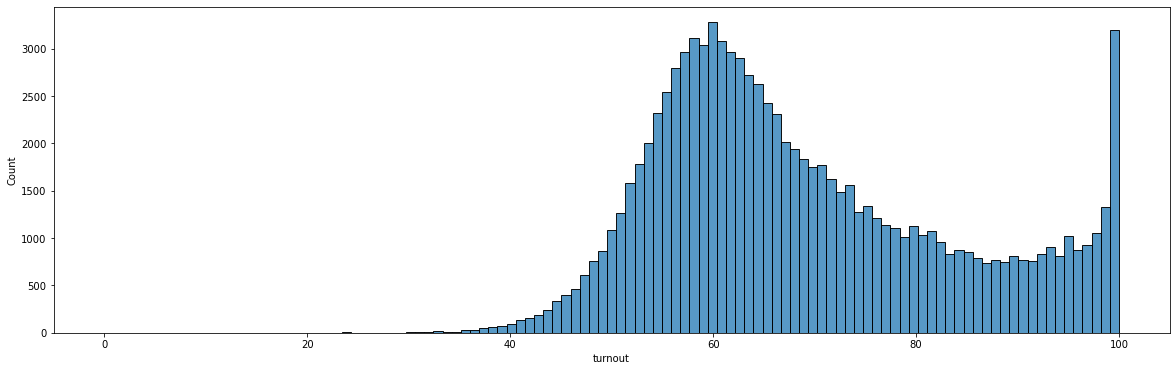

In [63]:
#Plotting 
sns.histplot(districtwise_election_agg_data['turnout'])
plt.show()

c.Create a scatterplot of the winners' votes and the turnout rate in each district. In some districts, there may be a high proportion of votes cast for the winners if there was election fraud or voter pressure to vote for a particular party. Some argue that numerous districts with nearly 100% voter turnout and nearly 100% votes for the winner are evidence of election fraud.

In [55]:
#Applying the condiotions and selecting the Winner
districtwise_election_agg_data['winner_votes'] = districtwise_election_agg_data[['votes_ZVZ', 'votes_GAZ','votes_SMM', 'votes_MP', 'votes_VP']].max(axis=1)
districtwise_election_agg_data['voting_percent_winner'] = districtwise_election_agg_data[['voting_percent_ZVZ', 'voting_percent_GAZ', 'voting_percent_SMM', 'voting_percent_MP', 'voting_percent_VP']].max(axis=1)

conditions = [districtwise_election_agg_data['winner_votes'].eq(districtwise_election_agg_data['votes_ZVZ']),
             districtwise_election_agg_data['winner_votes'].eq(districtwise_election_agg_data['votes_GAZ']),
             districtwise_election_agg_data['winner_votes'].eq(districtwise_election_agg_data['votes_SMM']),
             districtwise_election_agg_data['winner_votes'].eq(districtwise_election_agg_data['votes_MP']),
             districtwise_election_agg_data['winner_votes'].eq(districtwise_election_agg_data['votes_VP'])]
 
Options = ['Zhirinovsky Vladimir Zhirinovsky', 'Gennady Andreyevich Zyuganov','Sergei M. Mironov', 'Mikhail Prokhorov', 'Vladimir Putin']
 
districtwise_election_agg_data['winner'] = np.select(conditions, Options, default= 'Vladimir Putin' )
districtwise_election_agg_data

,district,total_voters,total_votes,votes_ZVZ,voting_percent_ZVZ,votes_GAZ,voting_percent_GAZ,votes_SMM,voting_percent_SMM,votes_MP,voting_percent_MP,votes_VP,voting_percent_VP,turnout,winner_votes,voting_percent_winner,winner
0,Republic of Adygea (Adygea),2383,1571,32.0,1.51,378.0,24.03,32.0,1.76,63.0,4.47,1053.0,67.04,65.925304,1053.0,67.04,Vladimir Putin
1,Republic of Adygea (Adygea),2865,1831,51.0,2.74,453.0,24.35,49.0,2.63,104.0,5.59,1174.0,63.12,63.909250,1174.0,63.12,Vladimir Putin
2,Republic of Adygea (Adygea),2821,1673,36.0,2.11,481.0,28.23,24.0,1.41,107.0,6.28,1025.0,60.15,59.305211,1025.0,60.15,Vladimir Putin
3,Republic of Adygea (Adygea),2069,1246,0.0,0.00,414.0,33.23,0.0,0.00,48.0,3.85,784.0,62.92,60.222330,784.0,62.92,Vladimir Putin
4,Republic of Adygea (Adygea),777,454,19.0,4.11,138.0,29.87,4.0,0.87,7.0,1.52,286.0,61.90,58.429858,286.0,61.90,Vladimir Putin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95568,The area outside the Russian Federation,1592,1489,12.0,0.75,8.0,0.50,3.0,0.19,6.0,0.38,1460.0,91.71,93.530151,1460.0,91.71,Vladimir Putin
95569,The area outside the Russian Federation,1233,994,113.0,11.31,74.0,7.41,13.0,1.30,46.0,4.60,748.0,74.87,80.616383,748.0,74.87,Vladimir Putin
95570,The area outside the Russian Federation,1093,463,2.0,0.42,32.0,6.79,0.0,0.00,3.0,0.64,426.0,90.45,42.360476,426.0,90.45,Vladimir Putin
95571,The area outside the Russian Federation,113,112,6.0,5.31,33.0,29.20,7.0,6.19,23.0,20.35,43.0,38.05,99.115044,43.0,38.05,Vladimir Putin


<AxesSubplot:xlabel='voting_percent_winner', ylabel='turnout'>

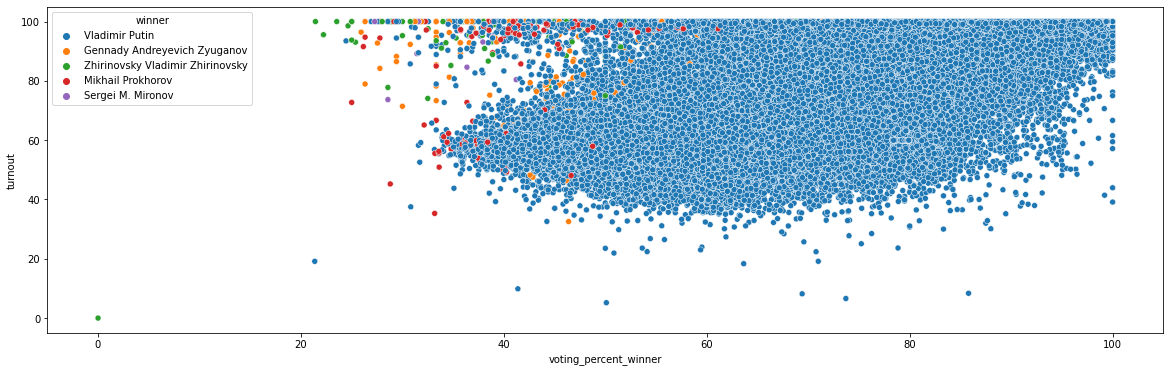

In [64]:
#Plotting the Scatterplot
sns.scatterplot(data=districtwise_election_agg_data, y="turnout", x="voting_percent_winner",hue="winner")

d. Given the number of districts in Russia, the plot in c is likely to have a large number of sites where information can be hidden. It's unclear whether the density of points in the plot varies. One approach to deal with this is to make each point's color have a low alpha, resulting in dark areas where there are more points clustered. A different approach is to take a random sample of the data. Create a scatterplot using one of these methods to examine whether there is a hotspot of districts with early 100% voter turnout and nearly 100% votes for the winner.

lets try to Set a low alpha for the color:

<AxesSubplot:xlabel='voting_percent_winner', ylabel='turnout'>

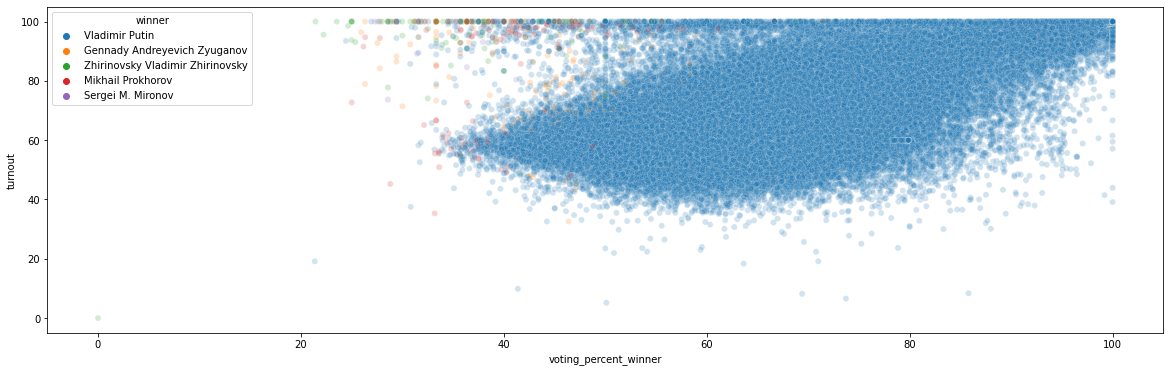

In [65]:
#Plottin the scatterplot
sns.scatterplot(data=districtwise_election_agg_data, y="turnout", x="voting_percent_winner",hue="winner", alpha = 0.2)

B. Random Sampling 


<AxesSubplot:xlabel='voting_percent_winner', ylabel='turnout'>

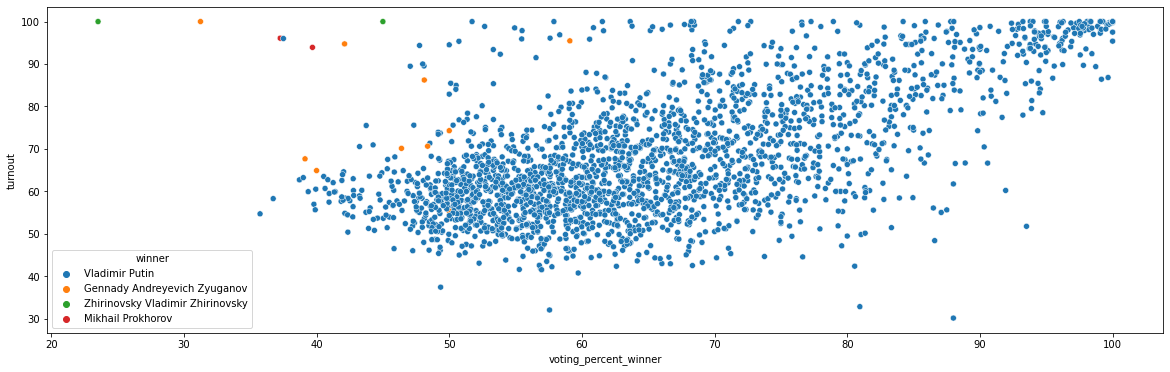

In [66]:
#Plot
sns.scatterplot(data=districtwise_election_agg_data.sample(frac =.025), y="turnout", x="voting_percent_winner",hue="winner")

We can easily see that Vladimir Putin is the winner in most of the districts based on random sampling and a low alpha for color.